In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
import math
warnings.filterwarnings('ignore')
print('Import Completed')

Import Completed


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_dataframe = pd.read_csv('/content/drive/MyDrive/EEE485/dataset/train.csv')
test_dataframe = pd.read_csv('/content/drive/MyDrive/EEE485/dataset/test.csv')
df = train_dataframe.copy()

print('Shape of data')
print(df.shape)
print('Number of rows:')
print(df.shape[0])
print('Number of columns:')
print(df.shape[1])
df.info()

Shape of data
(4250, 20)
Number of rows:
4250
Number of columns:
20
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-

In [ ]:
noise_std = 0.01
df_churn = df[df['churn'] == "yes"]
df_non_churn = df[df['churn'] == "no"]
num_additional_churn_samples = df["churn"].value_counts()["no"] / 0.65 * 0.35 - df["churn"].value_counts()["yes"]
num_additional_churn_samples = round(num_additional_churn_samples)

X_churn_augmented = []

for i in range(num_additional_churn_samples):
    random = np.random.randint(df_churn.shape[0])

    original_sample = df_churn.iloc[random]

    noise = np.random.normal(loc=0, scale=noise_std, size=original_sample.shape)

    new_sample = []

    for column in range(df_churn.shape[1]-1):

      if isinstance(df_churn.iloc[random, column], float):

        new_sample.append(df_churn.iloc[random, column] + noise[column])

      else:
        new_sample.append(df_churn.iloc[random, column])

    new_sample.append("yes")
    X_churn_augmented.append(new_sample)

In [ ]:
print(X_churn_augmented[0])

['MA', 127, 'area_code_408', 'yes', 'no', 0, 176.8916404592042, 110, 30.077982540714256, 167.89804139179913, 100, 14.276184845127865, 182.2133580566649, 138, 8.198314103791892, 7.6935231197431655, 2, 2.090836060798302, 1, 'yes']


In [ ]:
for i in range(len(X_churn_augmented)):
  df.loc[df.shape[0]+i] = X_churn_augmented[i]
print(df.shape[0])


5618


In [ ]:
np.random.seed(42)
df = df.sample(frac=1, random_state=np.random.RandomState())

In [ ]:
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
4346,MN,178,area_code_510,no,no,0,225.392855,104,38.328291,110.699727,90,9.402671,134.099304,109,6.04591,15.297942,5,4.117861,2,yes
871,RI,75,area_code_415,no,no,0,122.800000,89,20.880000,211.300000,104,17.960000,261.400000,91,11.76000,10.700000,2,2.890000,2,no
3902,MA,92,area_code_408,no,yes,21,227.800000,107,38.730000,156.400000,70,13.290000,259.700000,72,11.69000,12.400000,3,3.350000,0,no
4231,HI,53,area_code_510,yes,no,0,145.000000,80,24.650000,228.400000,82,19.410000,169.400000,109,7.62000,8.900000,5,2.400000,0,no
433,KY,122,area_code_408,no,yes,27,253.700000,84,43.130000,229.200000,109,19.480000,190.500000,123,8.57000,9.200000,5,2.480000,7,no


In [ ]:
df.insert(df.shape[1]-1,'total_net_minutes', (df['total_day_minutes'] + df['total_eve_minutes'] + df['total_night_minutes']))
df.insert(df.shape[1]-1,'total_net_calls',df['total_day_calls'] + df['total_eve_calls'] + df['total_night_calls'])
df.insert(df.shape[1]-1,'total_net_charge',df['total_day_charge'] + df['total_eve_charge'] + df['total_night_charge'])

df['voice_mail_plan'] = df['voice_mail_plan'].map({'yes': 1, 'no': 0})
df['international_plan'] = df['international_plan'].map({'yes': 1, 'no': 0})
df['churn'] = df['churn'].map({'yes': 1, 'no': 0})

df.drop(columns= ['state'], inplace= True)
df.drop(columns= ['total_intl_charge'], inplace= True)
df.drop(columns=['total_day_charge', 'total_eve_charge','total_night_charge',
                'total_day_calls','total_eve_calls', 'total_night_calls', 'total_day_minutes',
                 'total_eve_minutes', 'total_night_minutes'], inplace=True)
df.head()

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_intl_minutes,total_intl_calls,number_customer_service_calls,total_net_minutes,total_net_calls,total_net_charge,churn
4346,178,area_code_510,0,0,0,15.297942,5,2,470.191885,303,53.776873,1
871,75,area_code_415,0,0,0,10.700000,2,2,595.500000,284,50.600000,0
3902,92,area_code_408,0,1,21,12.400000,3,0,643.900000,249,63.710000,0
4231,53,area_code_510,1,0,0,8.900000,5,0,542.800000,271,51.680000,0
433,122,area_code_408,0,1,27,9.200000,5,7,673.400000,316,71.180000,0


<Axes: xlabel='churn', ylabel='count'>

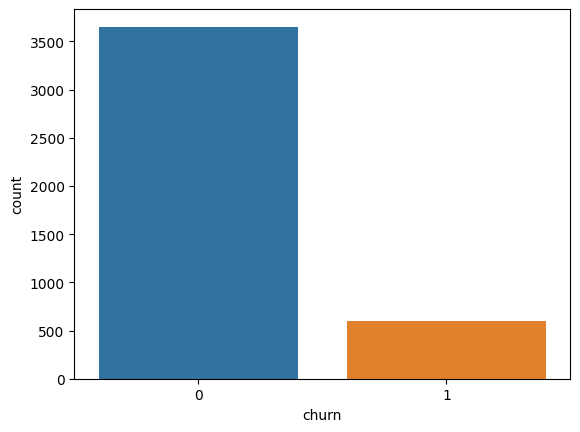

In [ ]:
train_dataframe.churn=train_dataframe.churn.map({"no":0,"yes":1})
sns.countplot(x = train_dataframe.churn)

<Axes: xlabel='churn', ylabel='count'>

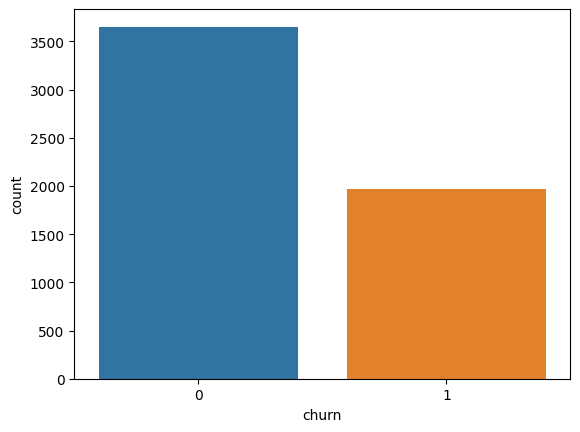

In [ ]:
sns.countplot(x = df.churn)

In [ ]:
churn_ratio =  pd.DataFrame(round(df['churn'].value_counts()/len(df['churn']),2)).T
print(churn_ratio)

          0     1
churn  0.65  0.35


categorical columns are ['area_code', 'international_plan', 'voice_mail_plan', 'churn']


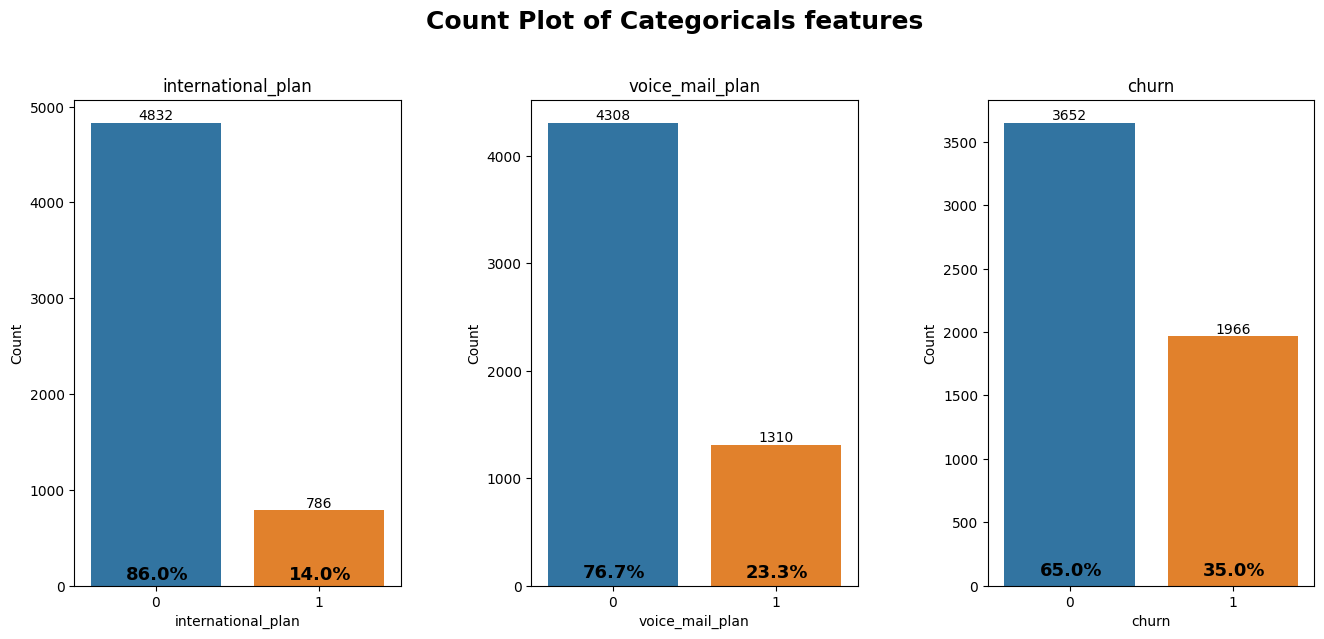

In [ ]:
categ_columns = []
for col in df.columns:
	if df[col].nunique()<9:
		categ_columns.append(col)

print('categorical columns are {}'.format(categ_columns))

fig = plt.figure(figsize=[16,15])
fig.suptitle('Count Plot of Categoricals features', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
graph_columns = categ_columns.copy()
graph_columns.remove('area_code')
for i , columns in enumerate(graph_columns):
    colmn = 'np.unique(df[columns] , return_counts = True)'
    ax1 = fig.add_subplot(2, 3, i+1);
    ax1 = sns.barplot(x=list(eval(f'{colmn}[0]')), y=list(eval(f'{colmn}[1]')))
    ax1.text(0.2, 120, '{}%' .format(str(round(eval(f'{colmn}[1][0]')/sum(eval(f'{colmn}[1]'))*100,1))), ha='right', va='center', size=13, fontdict={'weight': 'bold'})
    ax1.text(1.2, 120, '{}%' .format(str(round(eval(f'{colmn}[1][1]')/sum(eval(f'{colmn}[1]'))*100,1))), ha='right', va='center', size=13, fontdict={'weight': 'bold'})
    ax1.set_title(f'{columns}')
    ax1.set_xlabel(f'{columns}')
    ax1.set_ylabel('Count')
    ax1.bar_label(ax1.containers[0])

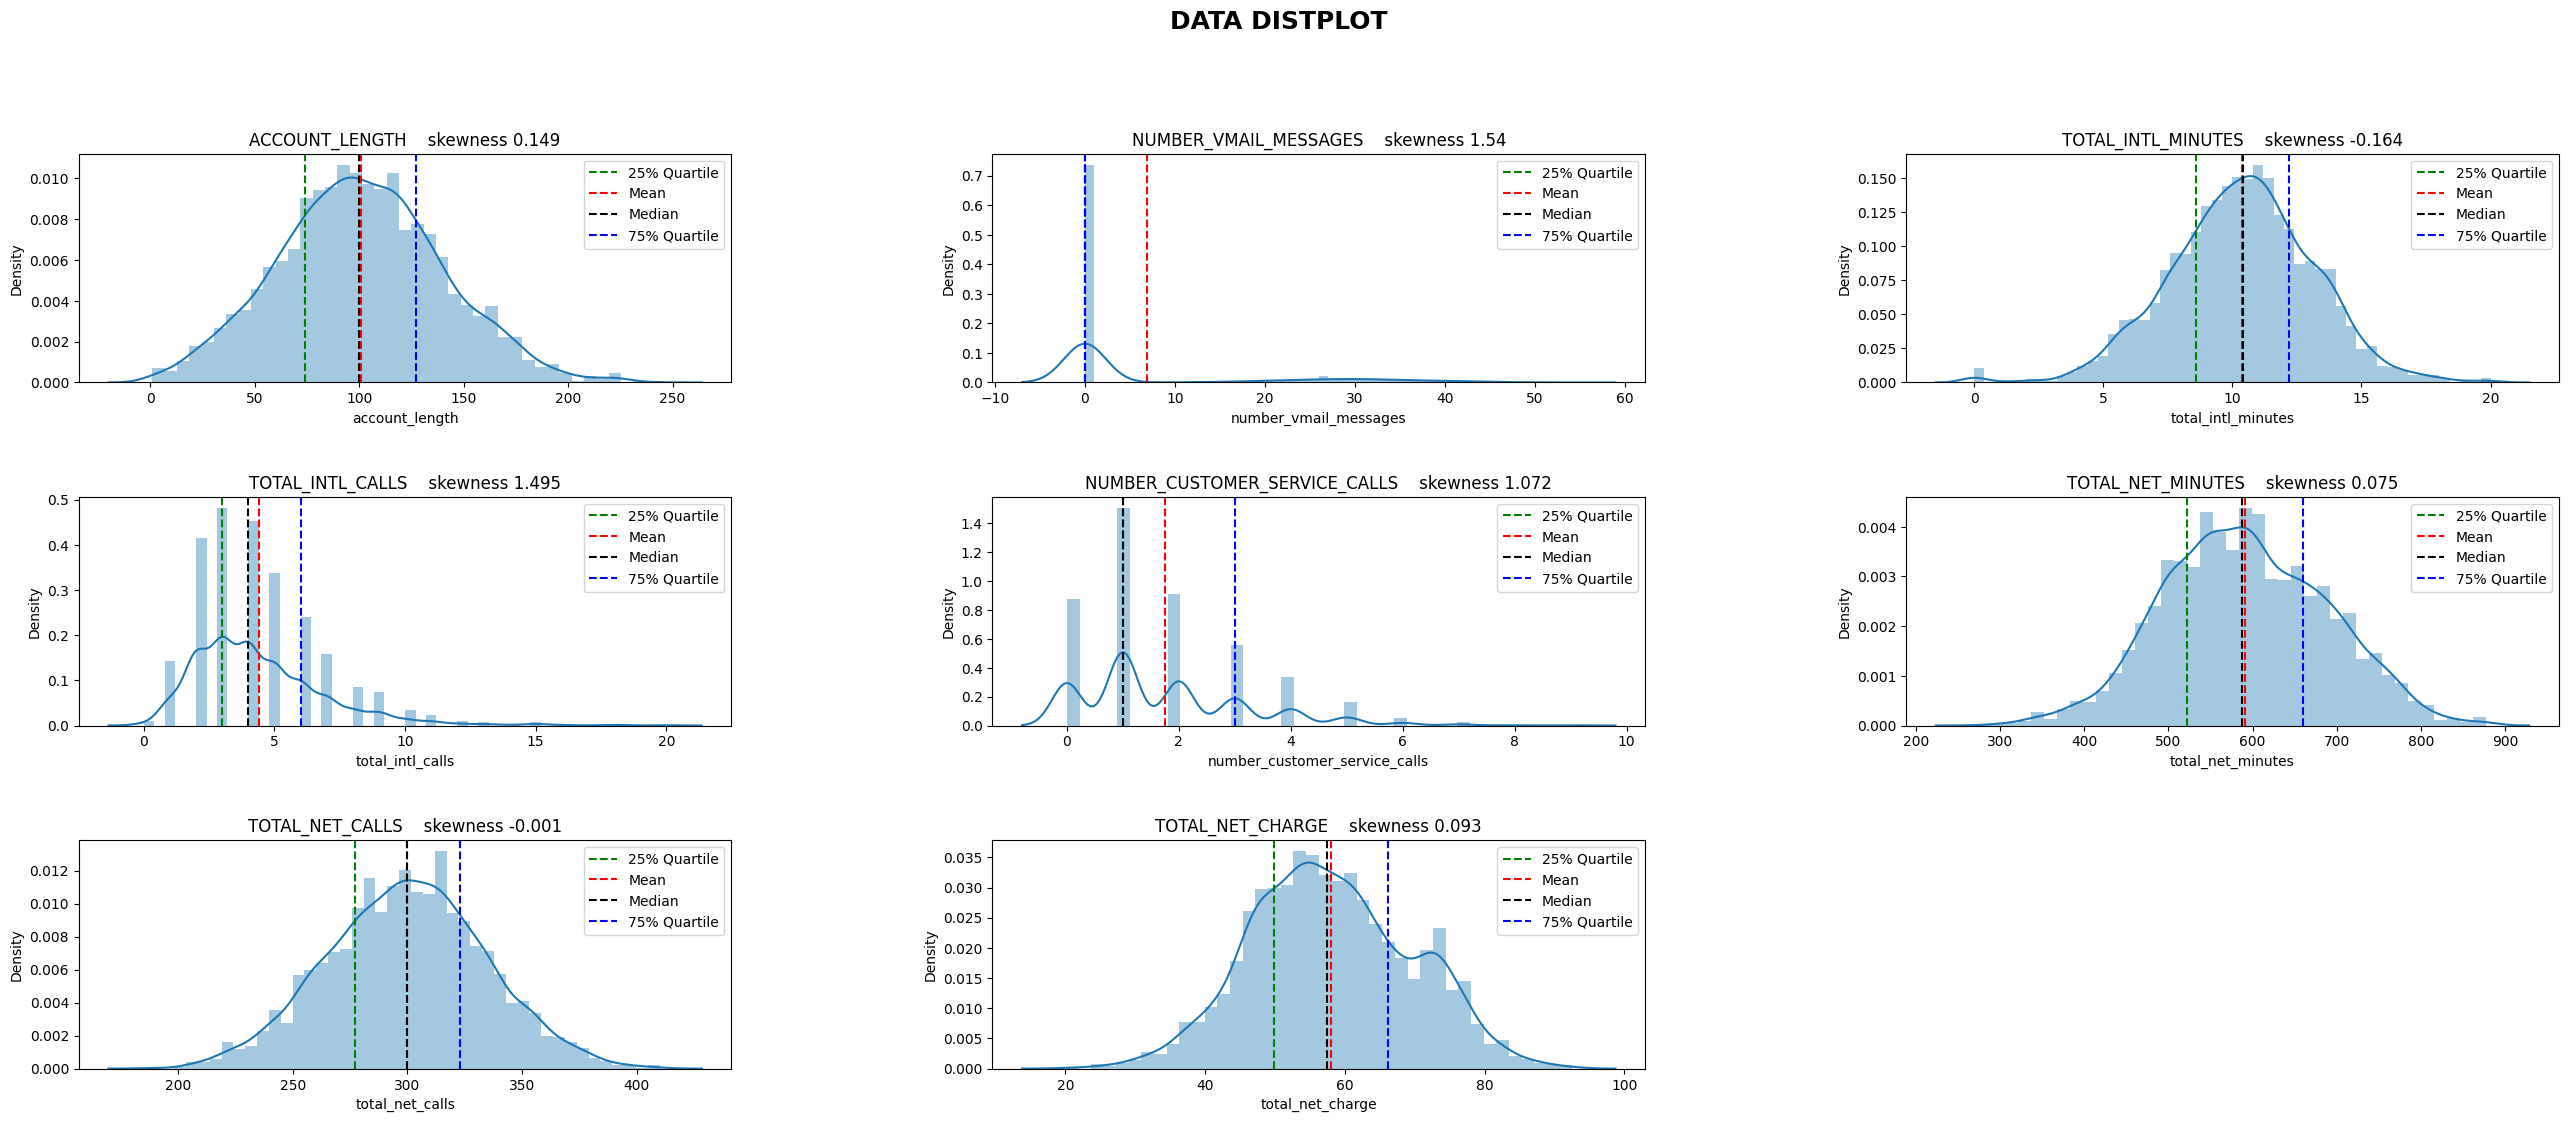

In [ ]:
fig = plt.figure(figsize=[32,24])
fig.suptitle('DATA DISTPLOT', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
Num_cols = []
for column in df.columns:
	if column not in categ_columns:
		Num_cols.append(column)
for i ,col in enumerate(Num_cols):
    ax = fig.add_subplot(6, 3, i+1)
    ax = sns.distplot(df[col])
    ax.axvline(df[col].quantile(q=0.25),color='green',linestyle='--',label='25% Quartile')
    ax.axvline(df[col].mean(),color='red',linestyle='--',label='Mean')
    ax.axvline(df[col].median(),color='black',linestyle='--',label='Median')
    ax.axvline(df[col].quantile(q=0.75),color='blue',linestyle='--',label='75% Quartile')
    ax.set_xlabel(f'{col}')
    ax.set_title(f'{col.upper()}    skewness {round(df[col].skew(),3)}')
    ax.legend(fontsize=10)

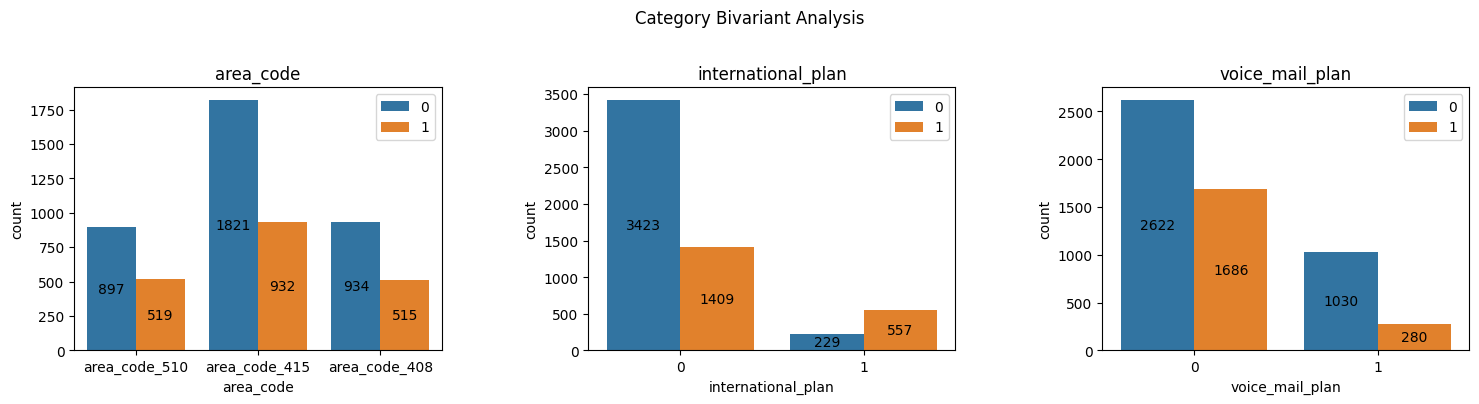

In [ ]:
fig = plt.figure(figsize=[18,13])
fig.suptitle('Category Bivariant Analysis')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(categ_columns):
  if col != "churn":
    f = fig.add_subplot(3, 3, i+1)
    f = sns.countplot(x = df[col], ax=f, hue = df['churn'])
    f.set_title(col)
    f.bar_label(f.containers[0] , label_type='center')
    f.bar_label(f.containers[1] , label_type='center')
    f.legend()

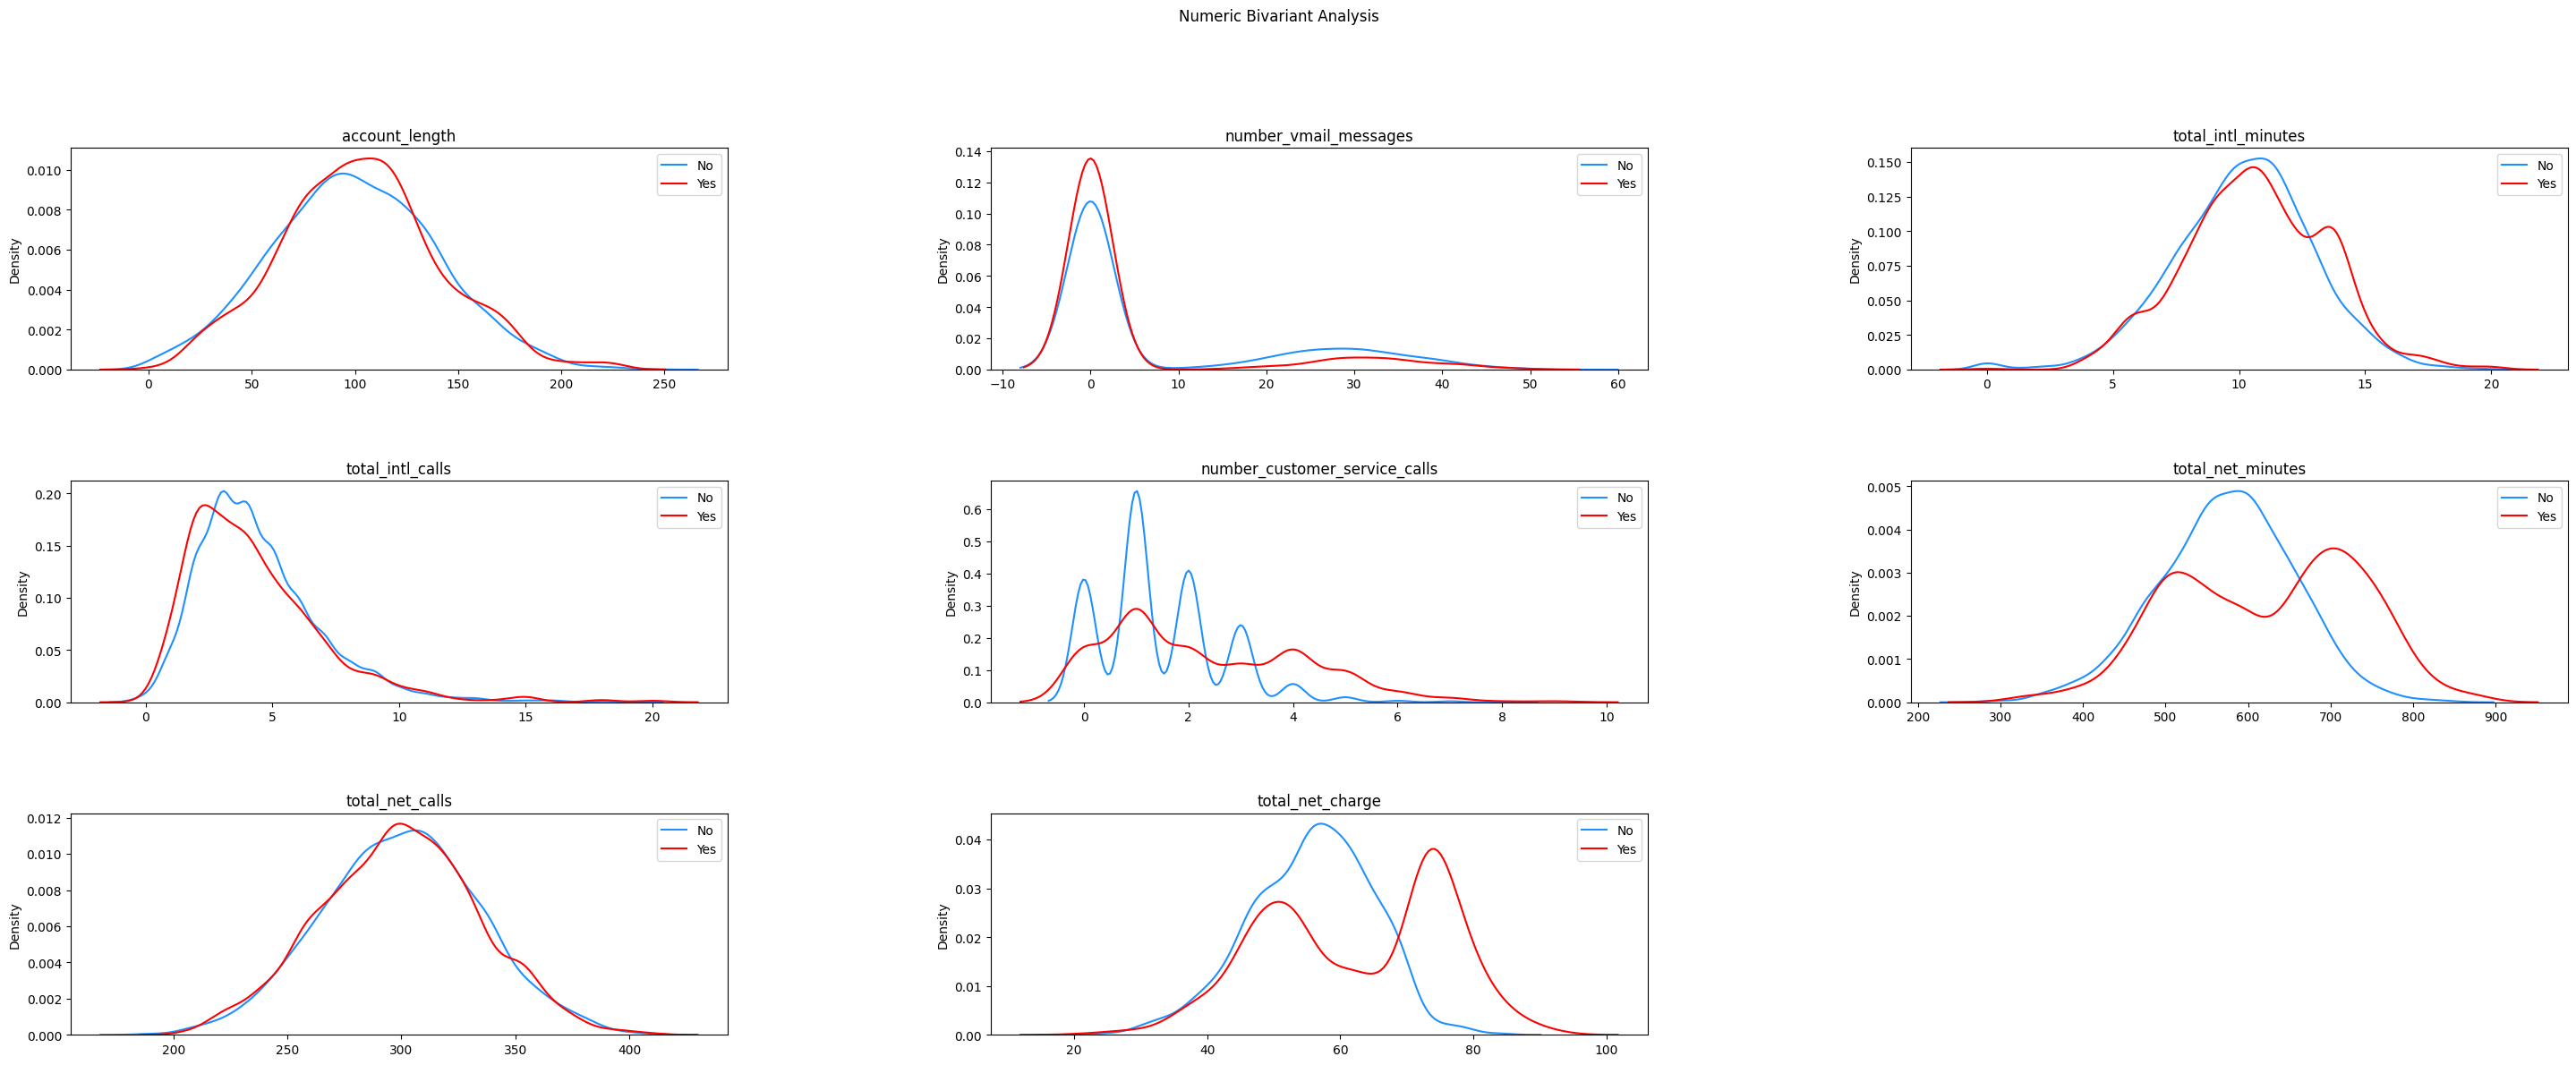

In [ ]:
fig = plt.figure(figsize=[36,26])
fig.suptitle('Numeric Bivariant Analysis')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(Num_cols):
    f = fig.add_subplot(6, 3, i+1)

    sns.distplot(x =df[df['churn']==0][col],  color='dodgerblue' , ax=f ,  hist =False)
    sns.distplot(x =df[df['churn']==1][col],  color='red' , ax=f , hist =False)
    f.set_title(col)
    labels = ['No' , 'Yes']
    f.legend(labels)

In [ ]:
((df[Num_cols].describe() < (df[Num_cols].describe().quantile(0.25) - 1.5 * df[Num_cols].describe().quantile(0.75) - df[Num_cols].describe().quantile(0.25))) | (df[Num_cols].describe() > (df[Num_cols].describe().quantile(0.75) + 1.5 * df[Num_cols].describe().quantile(0.75) - df[Num_cols].describe().quantile(0.25)))).any()

account_length                   True
number_vmail_messages            True
total_intl_minutes               True
total_intl_calls                 True
number_customer_service_calls    True
total_net_minutes                True
total_net_calls                  True
total_net_charge                 True
dtype: bool

In [ ]:
dict = {}
for col in Num_cols:
    percentile25 = df[col].quantile(0.25)
    percentile75 = df[col].quantile(0.75)
    IQR  = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * IQR
    lower_limit = percentile25 - 1.5 * IQR
    dict['upper_limit'+ '_' + col] = upper_limit
    dict['lower_limit'+ '_' + col] = lower_limit

In [ ]:
for col in Num_cols:
    print('There are total {} Customers data which {} are less than lower limit.'.format(len(df[df[col] < dict['lower_limit_' + col]] ) , col))
    print('There are total {} Customers data which {} are more than upper limit.'.format(len(df[df[col] > dict['upper_limit_' + col]] ) , col))

There are total 0 Customers data which account_length are less than lower limit.
There are total 35 Customers data which account_length are more than upper limit.
There are total 0 Customers data which number_vmail_messages are less than lower limit.
There are total 1309 Customers data which number_vmail_messages are more than upper limit.
There are total 39 Customers data which total_intl_minutes are less than lower limit.
There are total 32 Customers data which total_intl_minutes are more than upper limit.
There are total 0 Customers data which total_intl_calls are less than lower limit.
There are total 144 Customers data which total_intl_calls are more than upper limit.
There are total 0 Customers data which number_customer_service_calls are less than lower limit.
There are total 43 Customers data which number_customer_service_calls are more than upper limit.
There are total 9 Customers data which total_net_minutes are less than lower limit.
There are total 14 Customers data which t

In [ ]:
for col in Num_cols:
  if col != "number_vmail_messages":
    df[col] = np.where(
        df[col] > dict['upper_limit_' + col],
        dict['upper_limit_' + col],
        np.where(
            df[col] < dict['lower_limit_' + col],
            dict['lower_limit_' + col],
            df[col]
        )
    )

In [ ]:
df.head()

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_intl_minutes,total_intl_calls,number_customer_service_calls,total_net_minutes,total_net_calls,total_net_charge,churn
4346,178.0,area_code_510,0,0,0,15.297942,5.0,2.0,470.191885,303.0,53.776873,1
871,75.0,area_code_415,0,0,0,10.700000,2.0,2.0,595.500000,284.0,50.600000,0
3902,92.0,area_code_408,0,1,21,12.400000,3.0,0.0,643.900000,249.0,63.710000,0
4231,53.0,area_code_510,1,0,0,8.900000,5.0,0.0,542.800000,271.0,51.680000,0
433,122.0,area_code_408,0,1,27,9.200000,5.0,6.0,673.400000,316.0,71.180000,0


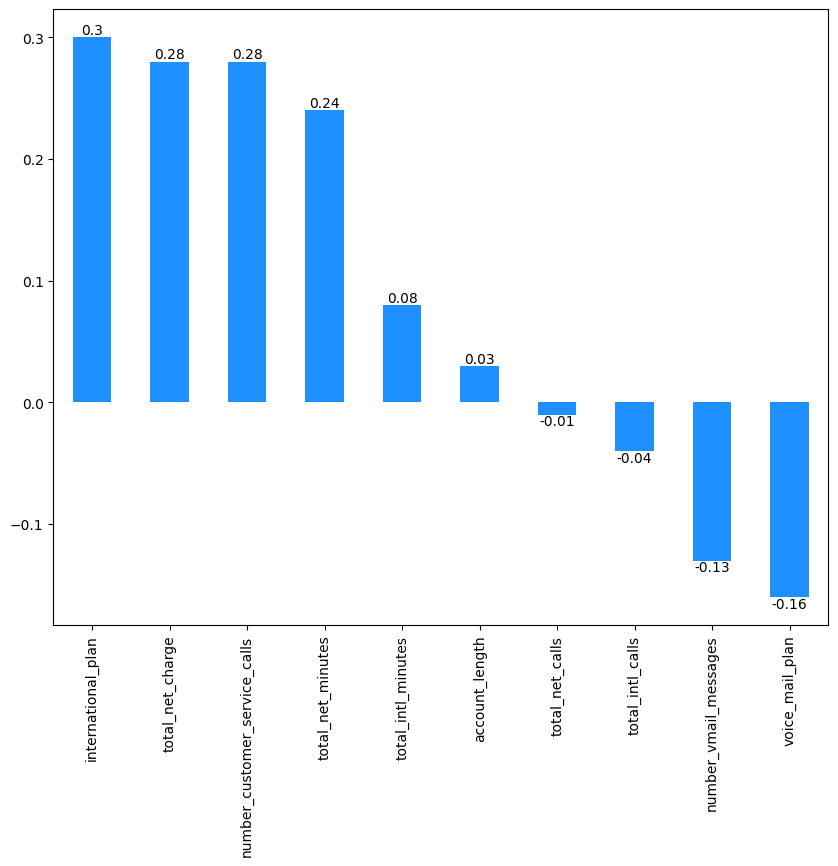

In [ ]:
ax = round(df.corr()['churn'].sort_values(ascending = False)[1:] ,2 ).plot(kind = 'bar' ,color='dodgerblue' , figsize = (10,8))
ax.bar_label(ax.containers[0])
plt.show()

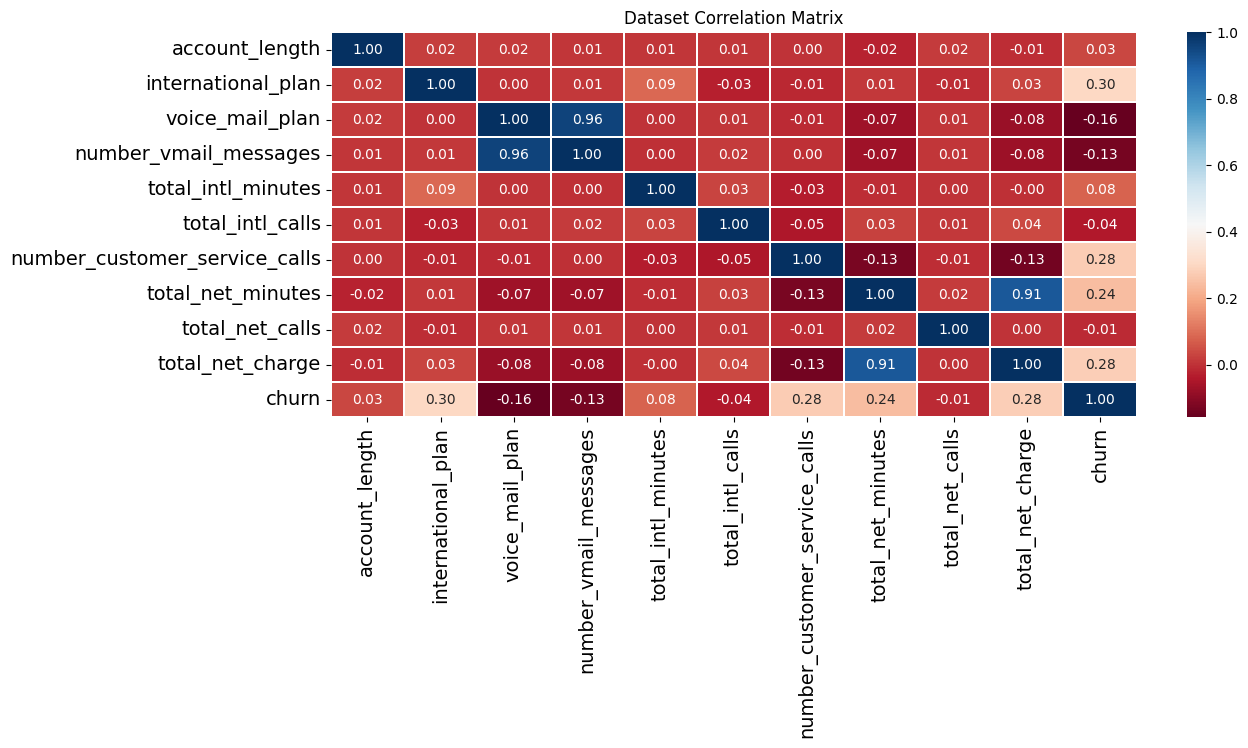

In [ ]:
figure, axis = plt.subplots(figsize=[13,5])
sns.heatmap(df.corr(), ax=axis,  annot=True, linewidths=0.05, fmt= '.2f',cmap='RdBu')
axis.tick_params(axis='both', which='major', labelsize=14)
axis.set_title('Dataset Correlation Matrix')
figure.show()

In [ ]:
def split_data(df, test_s):
    test_size = int(test_s * len(df))
    train_size = len(df) - test_size
    return df[:train_size].copy(), df[train_size:].copy()


print("Dataset")
print(df.__len__())

df, test_df = split_data(df, 0.10)
print("Train + Validation Dataset")
print(df.__len__())
print("Test Dataset")
print(test_df.__len__())

def split_data(df, val_pct):
    val_size = int(val_pct * len(df))
    train_size = len(df) - val_size
    return df[:train_size].copy(), df[train_size:].copy()


print("Dataset")
print(df.__len__())

train_df, val_df = split_data(df, 0.15)
print("Train Dataset")
print(train_df.__len__())
print("Validation Dataset")
print(val_df.__len__())

Dataset
5618
Train + Validation Dataset
5057
Test Dataset
561
Dataset
5057
Train Dataset
4299
Validation Dataset
758


In [ ]:
train_df = pd.get_dummies(train_df, columns=['area_code'])
val_df = pd.get_dummies(val_df, columns=['area_code'])
test_df = pd.get_dummies(test_df, columns=['area_code'])

In [ ]:
train_df.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_intl_minutes,total_intl_calls,number_customer_service_calls,total_net_minutes,total_net_calls,total_net_charge,churn,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510
4346,178.0,0,0,0,15.297942,5.0,2.0,470.191885,303.0,53.776873,1,0,0,1
871,75.0,0,0,0,10.700000,2.0,2.0,595.500000,284.0,50.600000,0,0,1,0
3902,92.0,0,1,21,12.400000,3.0,0.0,643.900000,249.0,63.710000,0,1,0,0
4231,53.0,1,0,0,8.900000,5.0,0.0,542.800000,271.0,51.680000,0,0,0,1
433,122.0,0,1,27,9.200000,5.0,6.0,673.400000,316.0,71.180000,0,1,0,0


In [ ]:
df = pd.get_dummies(df, columns=['area_code'])

# NN

In [ ]:
X_train = train_df.drop(columns=['churn'])
y_train = train_df['churn']
X_val = val_df.drop(columns=['churn'])
y_val = val_df['churn']
X_test = test_df.drop(columns=['churn'])
y_test = test_df['churn']

X_train = X_train.dropna()
X_val = X_val.dropna()
X_test = X_test.dropna()

def standardize(x):
    return (x - np.mean(x)) / np.std(x)

X_train = X_train.apply(standardize)
X_val = X_val.apply(standardize)
X_test = X_test.apply(standardize)

X_train = np.array(X_train)
X_val = np.array(X_val)
X_test = np.array(X_test)

y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

In [ ]:
class NeuralNetwork:
    def __init__(self, learning_rate=0.01):
        self.inputs = 13
        self.hiddenNodes = 10
        self.outputNodes = 1

        self.L1_weights = np.random.randn(self.inputs, self.hiddenNodes) * 0.01
        self.L2_weights = np.random.randn(self.hiddenNodes, self.outputNodes) * 0.01

        self.learning_rate = learning_rate

    def sigmoid(self, s):
        return 1 / (1 + np.exp(-s))

    def sigmoidPrime(self, s):
        return s * (1 - s)


    def feed_forward(self, X):
        self.hidden_sum = np.dot(X, self.L1_weights)
        self.activated_hidden = self.sigmoid(self.hidden_sum)
        self.output_sum = np.dot(self.activated_hidden, self.L2_weights)
        self.activated_output = self.sigmoid(self.output_sum)
        return self.activated_output

    def mse(self, y, o):
        error = y.reshape(-1, 1) - o.reshape(-1, 1)
        loss = np.mean(error**2)
        return loss, error

    def backpropagation(self, X, o, error):
        self.o_delta = 2 / X.shape[1] * error * self.sigmoidPrime(o)

        self.z2_error = self.o_delta.dot(self.L2_weights.T)
        self.z2_delta = self.z2_error * self.sigmoidPrime(self.activated_hidden)

        self.L1_weights += self.learning_rate * X.T.dot(self.z2_delta)
        self.L2_weights += self.learning_rate * self.activated_hidden.T.dot(self.o_delta)

    def calculate_accuracy(self, y_true, y_pred):
        true_count = 0
        y_pred = np.round(y_pred)

        for value in range(len(y_pred)):
            if y_pred[value] == y_true[value]:
                true_count += 1
        accuracy = (true_count/len(y_pred))

        return accuracy

    def train(self, X_train, y_train, X_val, y_val, epochs):
        training_losses = []
        validation_losses = []
        training_accuracies = []
        validation_accuracies = []

        for epoch in range(epochs):
            train_output = self.feed_forward(X_train)
            train_loss, train_error = self.mse(y_train, train_output)
            self.backpropagation(X_train, train_output, train_error)
            training_losses.append(train_loss)
            train_accuracy = self.calculate_accuracy(y_train, train_output)
            training_accuracies.append(train_accuracy)

            val_output = self.feed_forward(X_val)
            val_loss, val_error = self.mse(y_val, val_output)
            validation_losses.append(val_loss)
            val_accuracy = self.calculate_accuracy(y_val, val_output)
            validation_accuracies.append(val_accuracy)

            if epoch % 100 == 0:
                print(f"Epoch {epoch}: Train Loss = {train_loss}, Val Loss = {val_loss}, Train Accuracy = {train_accuracy}, Val Accuracy = {val_accuracy}")

        return training_losses, validation_losses, training_accuracies, validation_accuracies

    def predict(self, X):
        o = self.feed_forward(X)
        return o


neural_network = NeuralNetwork(learning_rate=0.005)

epochs = 2000
train_loss, val_loss, train_accuracy, val_accuracy = neural_network.train(X_train, y_train, X_val, y_val, epochs)

Epoch 0: Train Loss = 0.248916254495914, Val Loss = 0.2302670373824546, Train Accuracy = 0.6454989532449407, Val Accuracy = 0.6662269129287599
Epoch 100: Train Loss = 0.1822887038818266, Val Loss = 0.17432029631782084, Train Accuracy = 0.7164456850430333, Val Accuracy = 0.7308707124010554
Epoch 200: Train Loss = 0.15691954427527668, Val Loss = 0.14883768569673128, Train Accuracy = 0.7839032333100721, Val Accuracy = 0.7902374670184696
Epoch 300: Train Loss = 0.1561200283719307, Val Loss = 0.14733408671449316, Train Accuracy = 0.7848336822516865, Val Accuracy = 0.7955145118733509
Epoch 400: Train Loss = 0.15561336981801702, Val Loss = 0.14633722431689244, Train Accuracy = 0.7827401721330542, Val Accuracy = 0.7968337730870713
Epoch 500: Train Loss = 0.15513461723215818, Val Loss = 0.14552839485554064, Train Accuracy = 0.7827401721330542, Val Accuracy = 0.7994722955145118
Epoch 600: Train Loss = 0.1546545921717747, Val Loss = 0.14485763104216556, Train Accuracy = 0.7827401721330542, Val Ac

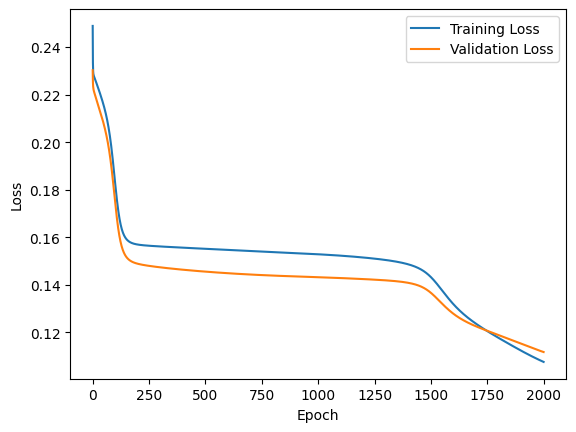

In [ ]:
plt.plot(range(epochs), train_loss, label='Training Loss')
plt.plot(range(epochs), val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

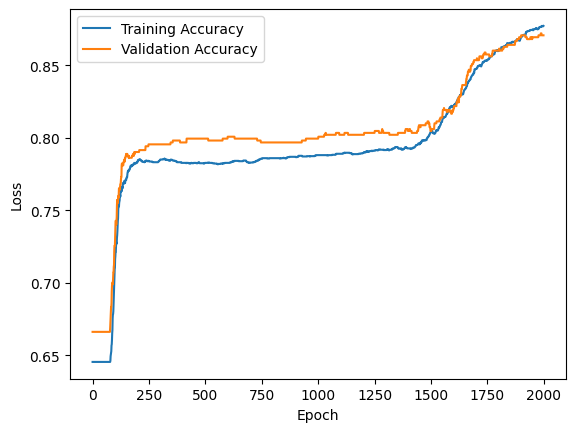

In [ ]:
plt.plot(range(epochs), train_accuracy, label='Training Accuracy')
plt.plot(range(epochs), val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
y_pred_test = neural_network.predict(X_test)

y_pred_test = np.round(y_pred_test)

In [ ]:
def accuracy(y, y_h):
    correct = 0
    for i in range(np.shape(y)[0]):
        if y[i] == y_h[i]:
            correct += 1
    return correct / np.shape(y)[0]

def f1(y,yh):
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    for i in range(len(y)):
        if y[i] == 1 and yh[i] == 1:
            tp += 1
        elif y[i] == 0 and yh[i] == 1:
            fp += 1
        elif y[i] == 0 and yh[i] == 0:
            tn += 1
        elif y[i] == 1 and yh[i] == 0:
            fn += 1

    if tp + fp == 0 or tp + fn == 0:
         return 0, 0, 0, np.array([[tp, fp], [fn, tn]]), 0, 0, 0

    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1s = 2 * precision * recall / (precision + recall)
    specificity = tn / (tn + fp)
    error = (fp + fn) / (tp + fp + tn + fn)
    rmse = np.sqrt(np.mean((y - yh)**2))
    confusion = np.array([[tp, fp], [fn, tn]])
    return f1s, precision, recall, confusion, error, rmse, specificity

print("Accuracy", accuracy(y_test, y_pred_test))
print("F1", f1(y_test, y_pred_test)[0])
print("Precision", f1(y_test, y_pred_test)[1])
print("Recall", f1(y_test, y_pred_test)[2])
print("Confusion Matrix")
print(f1(y_test, y_pred_test)[3])
print("Error", f1(y_test, y_pred_test)[4])
print("Specificity", f1(y_test, y_pred_test)[6])



Accuracy 0.8716577540106952
F1 0.8085106382978722
Precision 0.8128342245989305
Recall 0.8042328042328042
Confusion Matrix
[[152  35]
 [ 37 337]]
Error 0.12834224598930483
Specificity 0.9059139784946236



```
# This is formatted as code
```

##  NAIVE BAYES


In [ ]:
X_train = train_df.drop(columns=['churn'])
y_train = train_df['churn']
X_val = val_df.drop(columns=['churn'])
y_val = val_df['churn']
X_test = test_df.drop(columns=['churn'])
y_test = test_df['churn']

X_train = X_train.dropna()
X_val = X_val.dropna()
X_test = X_test.dropna()

In [ ]:
def fit(X, y):
    n_samples = X.shape[0]
    n_features = X.shape[1]
    n_classes = len(np.unique(y))

    mean = np.zeros((n_classes, n_features))
    variance = np.zeros((n_classes, n_features))
    priors = np.zeros(n_classes)

    for c in range(n_classes):
        X_c = X[y == c]

        mean[c, :] = np.mean(X_c, axis=0)
        variance[c, :] = np.var(X_c, axis=0)
        priors[c] = X_c.shape[0] / n_samples
    return mean, variance, priors

def gaussian_density(x, mean, var):
        const = 1 / np.sqrt(var * 2 * np.pi)
        probability = np.exp(-0.5 * ((x - mean) ** 2 / var))
        return const * probability

def get_class_probability(x, mean_list, variance_list, priors_list, len_y):
        posteriors = list()
        n_classes = len_y


        for c in range(n_classes):
            mean = mean_list[c]
            variance = variance_list[c]
            prior = np.log(priors_list[c])

            posterior = np.sum(np.log(gaussian_density(x, mean, variance)))
            posterior = prior + posterior
            posteriors.append(posterior)

        return np.argmax(posteriors)

def predict(X, mean_list, variance_list, priors_list, len_y):
      y_hat = [get_class_probability(X.iloc[row], mean_list, variance_list, priors_list, len_y)for row in range(len(X))]
      return np.array(y_hat)


mean, variance, probability = fit(X_train, y_train)
predictions = predict(X_test, mean, variance, probability, 2)

def accuracy(y, y_h):
    correct = 0
    for i in range(np.shape(y)[0]):
        if y.values[i] == y_h[i]:
            correct += 1
    return correct / np.shape(y)[0]

def f1(y,yh):
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    for i in range(len(y)):
        if y.values[i] == 1 and yh[i] == 1:
            tp += 1
        elif y.values[i] == 0 and yh[i] == 1:
            fp += 1
        elif y.values[i] == 0 and yh[i] == 0:
            tn += 1
        elif y.values[i] == 1 and yh[i] == 0:
            fn += 1

    if tp + fp == 0 or tp + fn == 0:
         return 0, 0, 0, np.array([[tp, fp], [fn, tn]]), 0, 0, 0

    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1s = 2 * precision * recall / (precision + recall)
    specificity = tn / (tn + fp)
    error = (fp + fn) / (tp + fp + tn + fn)
    rmse = np.sqrt(np.mean((y - yh)**2))
    confusion = np.array([[tp, fp], [fn, tn]])
    return f1s, precision, recall, confusion, error, rmse, specificity

print("Accuracy", accuracy(y_test, predictions))
print("F1", f1(y_test, predictions)[0])
print("Precision", f1(y_test, predictions)[1])
print("Recall", f1(y_test, predictions)[2])
print("Confusion Matrix")
print(f1(y_test, predictions)[3])
print("Error", f1(y_test, predictions)[4])
print("RMSE", f1(y_test, predictions)[5])
print("Specificity", f1(y_test, predictions)[6])


Accuracy 0.8377896613190731
F1 0.7598944591029023
Precision 0.7578947368421053
Recall 0.7619047619047619
Confusion Matrix
[[144  46]
 [ 45 326]]
Error 0.1622103386809269
RMSE 0.4027534465165095
Specificity 0.8763440860215054




```
# This is formatted as code
```

##  LOGISTIC REGRESSION

In [ ]:
train_df.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_intl_minutes,total_intl_calls,number_customer_service_calls,total_net_minutes,total_net_calls,total_net_charge,churn,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510
4346,178.0,0,0,0,15.297942,5.0,2.0,470.191885,303.0,53.776873,1,0,0,1
871,75.0,0,0,0,10.700000,2.0,2.0,595.500000,284.0,50.600000,0,0,1,0
3902,92.0,0,1,21,12.400000,3.0,0.0,643.900000,249.0,63.710000,0,1,0,0
4231,53.0,1,0,0,8.900000,5.0,0.0,542.800000,271.0,51.680000,0,0,0,1
433,122.0,0,1,27,9.200000,5.0,6.0,673.400000,316.0,71.180000,0,1,0,0


In [ ]:
X_train = train_df.drop(columns=['churn'])
y_train = train_df['churn']
X_val = val_df.drop(columns=['churn'])
y_val = val_df['churn']
X_test = test_df.drop(columns=['churn'])
y_test = test_df['churn']


def standardize(x):
    return (x - np.mean(x)) / np.std(x)

X_train = X_train.apply(standardize)
X_val = X_val.apply(standardize)
X_test = X_test.apply(standardize)

In [ ]:
X_train = X_train.dropna()
X_val = X_val.dropna()
X_test = X_test.dropna()


In [ ]:
def weight_init(n_features):
    w = np.zeros(n_features)
    b = 0
    return w, b

def sigmoid(x, w, b):
    z = np.dot(x, w) + b
    return 1 / (1 + np.exp(-z))

def log_cost(y, y_h, n_features):
    cost = -1/n_features * np.sum(y * np.log(y_h) + (1 - y) * np.log(1 - y_h))/len(y)
    return cost


Cost at iteration 0 is 0.053319013889226566
Validation cost at iteration 0 is 0.05305206893049366
Cost at iteration 1 is 0.053064636204919226
Validation cost at iteration 1 is 0.052790830404479475
Cost at iteration 2 is 0.05281578607551971
Validation cost at iteration 2 is 0.05253515554703556
Cost at iteration 3 is 0.05257232516263935
Validation cost at iteration 3 is 0.05228490457202954
Cost at iteration 4 is 0.05233411803363143
Validation cost at iteration 4 is 0.0520399406974515
Cost at iteration 5 is 0.052101032182716195
Validation cost at iteration 5 is 0.05180013016224779
Cost at iteration 6 is 0.05187293804352196
Validation cost at iteration 6 is 0.05156534223454691
Cost at iteration 7 is 0.05164970899366456
Validation cost at iteration 7 is 0.05133544921193164
Cost at iteration 8 is 0.05143122135197767
Validation cost at iteration 8 is 0.05111032641439788
Cost at iteration 9 is 0.05121735436899231
Validation cost at iteration 9 is 0.05088985217062223
Cost at iteration 10 is 0.0

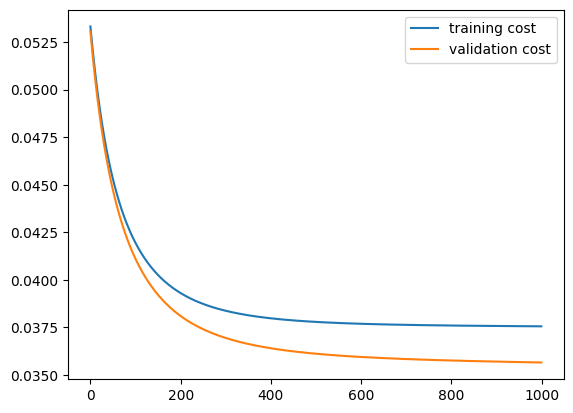

In [ ]:
def fit(x, x_val, y, y_val, alpha, n_features, iter):
    weights, bias = weight_init(n_features)
    cost_list = []
    val_list = []
    for i in range(iter):
        y_hat = sigmoid(x, weights, bias)
        cost = log_cost(y, y_hat, n_features)
        cost_list.append(cost)
        print(f'Cost at iteration {i} is {cost}')
        dw = 1/n_features * np.dot(x.T, (y_hat - y))
        db = 1/n_features * np.sum(y_hat - y)
        weights = weights - alpha * dw
        bias = bias - alpha * db

        y_h = sigmoid(x_val, weights, bias)
        val_cost = log_cost(y_val, y_h, n_features)
        val_list.append(val_cost)
        print(f'Validation cost at iteration {i} is {val_cost}')

    return weights,cost_list,bias, val_list

weights,cost,bias,val_cost = fit(X_train, X_val, y_train, y_val, 1e-4, X_train.shape[1], 1000)

plt.plot(cost, label='training cost')
plt.plot(val_cost, label='validation cost')
plt.legend()
plt.show()


In [ ]:
def predict(x, w, b, threshold):
    preds = []
    y_h = sigmoid(x, w, b)
    for i in range(len(y_h)):
        if y_h[i] > threshold:
            preds.append(1)
        else:
            preds.append(0)
    return preds




In [ ]:
def accuracy(y, y_h):
    correct = 0
    for i in range(np.shape(y)[0]):
        if y.values[i] == y_h[i]:
            correct += 1
    return correct / np.shape(y)[0]

def f1(y,yh):
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    for i in range(len(y)):
        if y.values[i] == 1 and yh[i] == 1:
            tp += 1
        elif y.values[i] == 0 and yh[i] == 1:
            fp += 1
        elif y.values[i] == 0 and yh[i] == 0:
            tn += 1
        elif y.values[i] == 1 and yh[i] == 0:
            fn += 1

    if tp + fp == 0 or tp + fn == 0:
         return 0, 0, 0, np.array([[tp, fp], [fn, tn]]), 0, 0, 0

    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1s = 2 * precision * recall / (precision + recall)
    specificity = tn / (tn + fp)
    error = (fp + fn) / (tp + fp + tn + fn)
    rmse = np.sqrt(np.mean((y - yh)**2))
    confusion = np.array([[tp, fp], [fn, tn]])
    return f1s, precision, recall, confusion, error, rmse

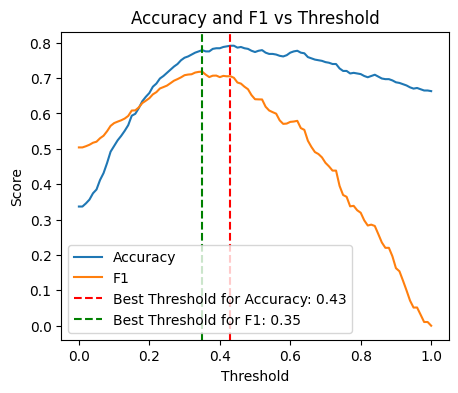

In [ ]:
res_acc = []
res_f1 = []
for threshold in np.arange(0, 1.01, 0.01):
    preds = predict(X_test,weights,bias, threshold)
    acc = accuracy(y_test, preds)
    f1s = f1(y_test, preds)[0]
    res_acc.append({'Threshold': threshold, 'Accuracy': acc})
    res_f1.append({'Threshold': threshold, 'F1': f1s})

acc_df = pd.DataFrame(res_acc)
f1_df = pd.DataFrame(res_f1)
best_thresh_acc = acc_df.sort_values(by='Accuracy', ascending=False).iloc[0]
best_thresh_f1 = f1_df.sort_values(by='F1', ascending=False).iloc[0]

#plot acc_df and f1_df together and show best thresholds
fig, ax = plt.subplots(figsize=(5, 4))
ax.plot(acc_df['Threshold'], acc_df['Accuracy'], label='Accuracy')
ax.plot(f1_df['Threshold'], f1_df['F1'], label='F1')
ax.set_xlabel('Threshold')
ax.set_ylabel('Score')
ax.set_title('Accuracy and F1 vs Threshold')
ax.axvline(best_thresh_acc['Threshold'], color='red', linestyle='--', label=f'Best Threshold for Accuracy: {best_thresh_acc["Threshold"]:.2f}')
ax.axvline(best_thresh_f1['Threshold'], color='green', linestyle='--', label=f'Best Threshold for F1: {best_thresh_f1["Threshold"]:.2f}')
ax.legend()
plt.show()



In [ ]:
predictions = predict(X_test, weights, bias, best_thresh_acc['Threshold'])
f1s, precision, recall, confusion, error, rmse = f1(y_test, predictions)
print("Accuracy = ",accuracy(y_test, predictions))
print("F1 score = ",f1s,"\nPrecision = ", precision, "\nRecall = ", recall, "\nError = ", error, "\nConfusion matrix = ", confusion)


Accuracy =  0.7914438502673797
F1 score =  0.7052896725440806 
Precision =  0.6730769230769231 
Recall =  0.7407407407407407 
Error =  0.20855614973262032 
Confusion matrix =  [[140  68]
 [ 49 304]]


# RIDGE CLASSIFIER

In [ ]:
def tanh(x, w, b):
    z = np.dot(x, w) + b
    return np.tanh(z)

def label_transform(y):
    y = y.copy()
    y[y == 0] = -1
    return y


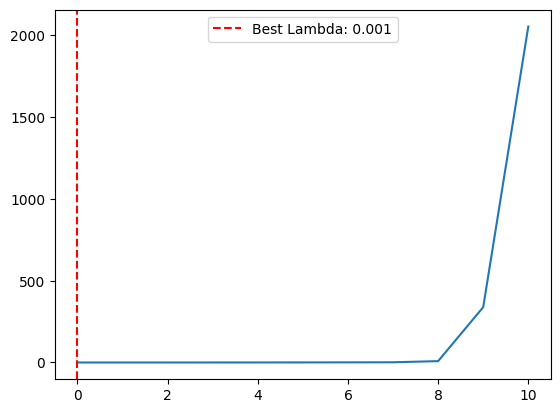

In [ ]:
def ridge_cost(y, y_h, n_features, w, lda):
    cost = (-1/n_features * np.sum(y * np.log(y_h) + (1 - y) * np.log(1 - y_h)))/len(y) + lda * np.sum(w**2)
    return cost

def ridge_fit_CV(df, alpha, n_features, iter, lda):
    df_split = np.array_split(df, 10)
    cost_list = []
    val_list = []
    holdout_list = []
    for i in range(len(df_split)):

        weights = np.random.randn(n_features)
        bias = np.random.randn(1)
        df_val = df_split[i]
        df_train = pd.concat(df_split[:i] + df_split[i+1:])
        X_train = df_train.drop('churn', axis=1)

        y_train = df_train['churn']
        X_val = df_val.drop('churn', axis=1)
        y_val = df_val['churn']
        X_train = standardize(X_train)
        X_val = standardize(X_val)

        y_train = label_transform(y_train)
        y_val = label_transform(y_val)
        for j in range(iter):
            y_h = tanh(X_train, weights, bias)
            cost = ridge_cost(y_train, y_h, n_features, weights, lda)
            grad_w = (1/n_features * np.dot(X_train.T, (y_h - y_train))) + 2 * lda * weights
            grad_b = (1/n_features * np.sum(y_h - y_train))
            weights -= alpha * grad_w
            bias -= alpha * grad_b
            y_h_val = tanh(X_val, weights, bias)
            val_cost = ridge_cost(y_val, y_h_val, n_features, weights, lda)
            cost_list.append(cost)
            val_list.append(val_cost)
        holdout = ridge_cost(y_val, y_h_val, n_features, weights, lda)
        holdout_list.append(holdout)

    return weights, bias, cost_list, val_list, holdout_list
lda_list = [0.001, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 10, 100, 150, 1000]
mean_holdout = []
for i in lda_list:
    weights_r,bias_r,cost_r,val_cost_r,holdouts = ridge_fit_CV(df, 5e-3, X_train.shape[1], 250, i)
    mean_holdout_i = np.mean(holdouts)
    mean_holdout.append(mean_holdout_i)


best_lambda = lda_list[np.argmin(mean_holdout)]
plt.plot(mean_holdout)
plt.axvline(np.argmin(mean_holdout), color='red', linestyle='--', label=f'Best Lambda: {best_lambda}')
plt.legend()
plt.show()

Training cost at iteration 0 is 0.12389406835467318
Validation cost at iteration 0 is 0.12988013388223554
Training cost at iteration 1 is 0.11997276571783178
Validation cost at iteration 1 is 0.12531076066070138
Training cost at iteration 2 is 0.11615952095882022
Validation cost at iteration 2 is 0.12233149391144624
Training cost at iteration 3 is 0.11301367416862258
Validation cost at iteration 3 is 0.11754620205444384
Training cost at iteration 4 is 0.10946241481857935
Validation cost at iteration 4 is 0.1138580283230207
Training cost at iteration 5 is 0.1062812402266708
Validation cost at iteration 5 is 0.10962349200348322
Training cost at iteration 6 is 0.10370108770262775
Validation cost at iteration 6 is 0.1068285604627516
Training cost at iteration 7 is 0.10006855293647722
Validation cost at iteration 7 is 0.10520217276202871
Training cost at iteration 8 is 0.0966984122658429
Validation cost at iteration 8 is 0.10052632964549749
Training cost at iteration 9 is 0.0932694012038028

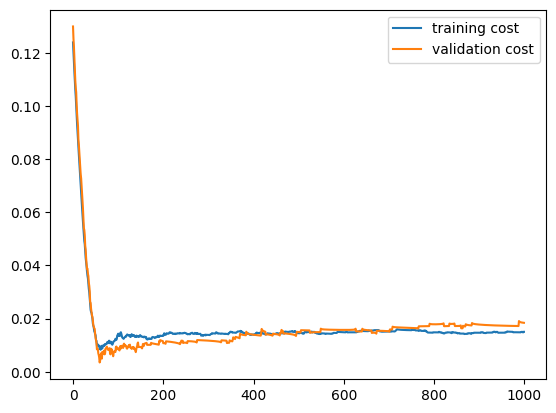

In [ ]:
def ridge_fit(x, x_val, y, y_val, alpha, n_features, iter, lda):
    weights = np.random.randn(n_features)
    bias = np.random.randn(1)
    cost_list = []
    val_list = []
    y = label_transform(y)
    y_val = label_transform(y_val)
    for i in range(iter):
        y_h = tanh(x, weights, bias)
        cost = ridge_cost(y, y_h, n_features, weights, lda)
        cost_list.append(cost)
        print(f'Training cost at iteration {i} is {cost}')
        dw = 1/n_features * np.dot(x.T, (y_h - y)) + 2 * lda * weights
        db = 1/n_features * np.sum(y_h - y)
        weights = weights - alpha * dw
        bias = bias - alpha * db

        y_h = tanh(x_val, weights, bias)
        val_cost = ridge_cost(y_val, y_h, n_features, weights, lda)
        val_list.append(val_cost)
        print(f'Validation cost at iteration {i} is {val_cost}')
    return weights, bias, cost_list, val_list

weights_r,bias_r,cost_r,val_cost_r = ridge_fit(X_train, X_val, y_train, y_val, 1e-4, X_train.shape[1], 1000, np.argmin(mean_holdout))
plt.plot(cost_r, label='training cost')
plt.plot(val_cost_r, label='validation cost')
plt.legend()
plt.show()

In [ ]:
def ridge_predict(x, w, b):
    preds = []
    y_h = tanh(x, w, b)
    for i in range(len(y_h)):
        if y_h[i] < 0:
            preds.append(-1)
        else:
            preds.append(1)
    return preds


In [ ]:
def accuracy_r(y, yh):
    return np.sum(y == yh) / len(y)

def f1_r(y, yh):
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    for i in range(len(y)):
        if y[i] == 1 and yh[i] == 1:
            tp += 1
        elif y[i] == -1 and yh[i] == 1:
            fp += 1
        elif y[i] == -1 and yh[i] == -1:
            tn += 1
        elif y[i] == 1 and yh[i] == -1:
            fn += 1

    if tp + fp == 0 or tp + fn == 0:
         return 0, 0, 0, np.array([[tp, fp], [fn, tn]]), 0, 0, 0

    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1s = 2 * precision * recall / (precision + recall)
    specificity = tn / (tn + fp)
    error = (fp + fn) / (tp + fp + tn + fn)
    confusion = np.array([[tp, fp], [fn, tn]])
    return f1s, precision, recall, confusion, error


In [ ]:
y_pred = ridge_predict(X_test, weights_r, bias_r)
y_test_ridge = label_transform(y_test)
f1s, precision, recall, confusion, error = f1_r(list(y_test_ridge), y_pred)
print("Accuracy = ",accuracy_r(y_test_ridge, y_pred))
print("F1 score = ",f1s,"\nPrecision = ", precision, "\nRecall = ", recall, "\nError = ", error, "\nConfusion matrix = ", confusion)



Accuracy =  0.7736185383244206
F1 score =  0.6422535211267606 
Precision =  0.6867469879518072 
Recall =  0.6031746031746031 
Error =  0.22638146167557932 
Confusion matrix =  [[114  52]
 [ 75 320]]
